# NLP HW1
### Mohammadreza Daviran - 98101566

### Install and import required libraries

In [105]:
! pip install --user -U nltk
! pip install selenium
! pip install bs4
! pip install requests

     |████████████████████████████████| 1.5 MB 418 kB/s eta 0:00:01
     |████████████████████████████████| 294 kB 643 kB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hazm 0.7.0 requires nltk==3.3, but you have nltk 3.8.1 which is incompatible.


## Introduction

I have gathered every criticism of <i>The Godfather trilogy</i> from IMDB User Reviews. Then I did some preprocessing on the data and analyzed it, which I will explain later. Finally I compare each on of the movies to the others in the topic of sentiment analysis.

![the_godfather](the_godfather.jpg)

I used these three links for crawling all the critisms from IMDB:

- <a href='https://www.imdb.com/title/tt0068646/reviews?ref_=tt_urv'>Godfather 1 IMDB User Review</a>

- <a href='https://www.imdb.com/title/tt0071562/reviews?ref_=tt_urv'>Godfather 2 IMDB User Review</a>

- <a href='https://www.imdb.com/title/tt0099674/reviews?ref_=tt_urv'>Godfather 3 IMDB User Review</a>

## Crawl and find the datasets

There are some difficulties in retrieving all the datas from IMDB; for instance, I have to click on the *Load More* button once in a while to load more critisims. So I'm going to use **Selenium** library to do this and interactively use IMDB reviews. First I will import required libraries for using **Selenium**.

In [102]:
from selenium import webdriver      
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import matplotlib.pyplot as plt

crawler.py is included in the zip file but the neccessary functions are in the following cells. For running these cells you need to have a webdriver in any specific path you want and also a browser! I used chromdriver as my webdriver and google chrome as my browser in this matter. It is included in the zip file too!

page_loader function gets the url and iteration_num, then clicks on the *Load More* button *iteration_num* times!

In [103]:
def page_loader(url, iteration_num):

    driver.get(url)

    for i in range(iteration_num):
        try:
            time.sleep(2)
            try:
                button = driver.find_element(By.XPATH, "//button[text()='Load More']"
                button.click()
            except:
                print(i)
            time.sleep(10)
        except Exception as e:
            print(e)
            break
    print("Complete")
    time.sleep(5)

<ipython-input-103-033df9577515>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


Message: element not interactable
  (Session info: chrome=110.0.5481.177)
Stacktrace:
0   chromedriver                        0x0000000101173fa8 chromedriver + 4886440
1   chromedriver                        0x00000001010f1643 chromedriver + 4351555
2   chromedriver                        0x0000000100d3f99d chromedriver + 477597
3   chromedriver                        0x0000000100d85f51 chromedriver + 765777
4   chromedriver                        0x0000000100d76d73 chromedriver + 703859
5   chromedriver                        0x0000000100daa5d2 chromedriver + 914898
6   chromedriver                        0x0000000100d763dd chromedriver + 701405
7   chromedriver                        0x0000000100daa78e chromedriver + 915342
8   chromedriver                        0x0000000100dc55fe chromedriver + 1025534
9   chromedriver                        0x0000000100daa3a3 chromedriver + 914339
10  chromedriver                        0x0000000100d7457f chromedriver + 693631
11  chromedriver    

By using crawler function I'll save these attributes for each movie:
- Scores: All of the scores that has been given to the movie by the critics.
- Date: The dates that the critics were written.
- Criticism: The complete text of the criticisms!
- Spoilers: Number of criticisms that have the spoiler alert!

The index of each file indicate the movie's part number.

In [116]:
def crawler(movie_num, url):
    if movie_num == 1:
        page_loader(url, 200)
    if movie_num == 2:
        page_loader(url, 120)
    if movie_num == 3:
        page_loader(url, 40)
    scores = driver.find_elements(By.XPATH, '//span[@class="rating-other-user-rating"]/span[1]')
    print('number of scores retrieved:', len(scores))

    dates = driver.find_elements(By.XPATH, '//span[@class="review-date"]')
    print('number of dates retrieved:', len(dates))

    criticisms = driver.find_elements(By.XPATH, '//div[@class="text show-more__control"]')
    print('number of Criticisms retrieved:', len(criticisms))

    spoilers = driver.find_elements(By.XPATH, '//span[@class="spoiler-warning"]')
    print('number of Spoilers retrieved:', len(spoilers))

    f = open('Dataset/scores_' + str(movie_num) + '.txt', 'w', encoding='utf-8')
    for score in scores:
        f.write(f'{score.text}\n')
    f.close()

    f = open('Dataset/dates_' + str(movie_num) + '.txt', 'w', encoding='utf-8')
    for date in dates:
        f.write(f'{date.text}\n')
    f.close()

    f = open('Dataset/criticisms_' + str(movie_num) + '.txt', 'w', encoding='utf-8')
    for crit in criticisms:
        f.write(f'{crit.text}\n')
    f.close()

    f = open('Dataset/spoilers_' + str(movie_num) + '.txt', 'w', encoding='utf-8')
    for spoiler in spoilers:
        f.write(f'{spoiler.text}\n')
    f.close()

*PATH* is the path to your driver. You can change it if you want to run it yourself. It is highly recommended to use crawler.py and change the path to the driver there.

In [117]:
PATH = '/Applications/chromedriver'
driver = webdriver.Chrome(PATH)

godfather1_url = "https://www.imdb.com/title/tt0068646/reviews?ref_=tt_urv"
crawler(1, godfather1_url)

godfather2_url = "https://www.imdb.com/title/tt0071562/reviews?ref_=tt_urv"
crawler(2, godfather2_url)

godfather3_url = "https://www.imdb.com/title/tt0099674/reviews?ref_=tt_urv"
crawler(3, godfather3_url)

In [12]:
driver.quit()

## Preprocessing and get some information from the datas
Now that we have our dataset we want to do our pre-proccesing tasks on it and get some useful information.

### Install and import required libraries

In [167]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammadreza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammadreza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohammadreza/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mohammadreza/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Find common words used in the criticisms in each movie

First we do all the required preprocessings.

In [184]:
def to_lower(string):
    return string.lower()

In [185]:
def tokenizer(string):
    return TweetTokenizer().tokenize(string)

In [186]:
def remove_stopwords(input):
    stop_words = set(stopwords.words('english'))
    return [w.lower() for w in input if w not in stop_words]

In [187]:
def punctuation_remover(input):
    return list(filter(lambda t: t not in string.punctuation, input))

In [188]:
def find_frequent_words(input):
    return nltk.FreqDist(w.lower() for w in input)

In [189]:
def find_most_common(criticisms_str):
    tokenized_str = tokenizer(" ".join(to_lower(criticisms_str).split()))
    normalized_str = punctuation_remover(remove_stopwords(tokenized_str))
    frequent_words = find_frequent_words(normalized_str)
    return frequent_words.most_common(25)

After the preprocessings, I am going to find the common words for each on of the movies:

In [216]:
criticism_first_movie = ''
with open('Dataset/criticisms_1.txt', 'r', encoding='utf-8', errors='ignore') as f:
    criticism_first_movie = f.read()
criticism_first_movie = criticism_first_movie.strip()
most_common_words_1 = find_most_common(criticism_first_movie)

criticism_second_movie = ''
with open('Dataset/criticisms_2.txt', 'r', encoding='utf-8', errors='ignore') as f:
    criticism_second_movie = f.read()
criticism_second_movie = criticism_second_movie.strip()
most_common_words_2 = find_most_common(criticism_second_movie)

criticism_third_movie = ''
with open('Dataset/criticisms_3.txt', 'r', encoding='utf-8', errors='ignore') as f:
    criticism_third_movie = f.read()
criticism_third_movie = criticism_third_movie.strip()
most_common_words_3 = find_most_common(criticism_third_movie)

In [217]:
import pandas as pd

freq_analysis_1 = pd.DataFrame(most_common_words_1 , columns=['words_1', 'frequent_1'])
freq_analysis_2 = pd.DataFrame(most_common_words_2 , columns=['words_2', 'frequent_2'])
freq_analysis_3 = pd.DataFrame(most_common_words_3 , columns=['words_3', 'frequent_3'])

pd.concat([freq_analysis_1, freq_analysis_2, freq_analysis_3], axis=1)

,words_1,frequent_1,words_2,frequent_2,words_3,frequent_3
0,movie,4321,movie,715,movie,368
1,film,2553,godfather,544,godfather,294
2,godfather,1706,film,466,film,267
3,one,1473,one,441,first,239
4,best,1437,part,403,two,231
5,time,1105,first,359,part,221
6,great,1051,best,286,good,180
7,ever,985,pacino,257,one,174
8,like,954,corleone,249,like,153
9,movies,937,great,236,michael,143


## Lematization of the most frequent words

Next, I am going to lemmatize the criticisms and then find the most frequent words and show them in the table:

In [192]:
from nltk.stem import WordNetLemmatizer
import tqdm

lemmatizer = WordNetLemmatizer()


def lematizing(criticisms_str, movie_name):
    
    tokenized_str = tokenizer(" ".join(to_lower(criticisms_str).split()))

    normalized_text = punctuation_remover(remove_stopwords(tokenized_str))

    lemmatized_text = [lemmatizer.lemmatize(tok) for tok in tqdm.tqdm(normalized_text)]
    df_nonstop_lemstem = {}
    df_nonstop_lemstem[movie_name] = nltk.FreqDist(eval(F"lemmatized_text")).most_common(20)
    freq_analysis_nonstop_lemstem = pd.DataFrame(df_nonstop_lemstem)
    return freq_analysis_nonstop_lemstem

lematizing_1 = lematizing(criticism_first_movie, "Godfather 1")
lematizing_2 = lematizing(criticism_second_movie, "Godfather 2")
lematizing_3 = lematizing(criticism_third_movie, "Godfather 3")
pd.concat([lematizing_1, lematizing_2, lematizing_3], axis=1)

100%|██████████| 18281/18281 [00:00<00:00, 286823.94it/s]


,Godfather 1,Godfather 2,Godfather 3
0,"(movie, 5259)","(movie, 846)","(movie, 479)"
1,"(film, 3063)","(film, 555)","(film, 370)"
2,"(godfather, 1718)","(godfather, 549)","(godfather, 299)"
3,"(one, 1497)","(one, 444)","(part, 256)"
4,"(time, 1439)","(part, 430)","(first, 239)"
5,"(best, 1438)","(first, 359)","(two, 231)"
6,"(great, 1064)","(best, 287)","(good, 182)"
7,"(ever, 985)","(sequel, 264)","(one, 182)"
8,"(like, 969)","(pacino, 257)","(like, 153)"
9,"(watch, 919)","(story, 256)","(michael, 143)"


## Number of criticisms with Spoilers Alert

In this matter I find the number of the critisims with spoiler alert in them.

In [193]:
def num_of_spoilers(movie_num):
    with open('Dataset/spoilers_' + str(movie_num) + '.txt', 'r', encoding='utf-8', errors='ignore') as f:
        spoilers_text = f.read()
    return len(spoilers_text.split('\n'))

print(f'Number of criticisms with spoiler for Godfather 1: {num_of_spoilers(1)}')
print(f'Number of criticisms with spoiler for Godfather 2: {num_of_spoilers(2)}')
print(f'Number of criticisms with spoiler for Godfather 3: {num_of_spoilers(3)}')

Number of criticisms with spoiler for Godfather 1: 908
Number of criticisms with spoiler for Godfather 2: 278
Number of criticisms with spoiler for Godfather 3: 221


## Average Scores of the movie

We calculate average score of these criticisms by calculating sum of the score data we collect from IMDB and divide it by the number of the scores. Some of the criticisms don't have any score so we reduce 1 from the length of scores to calculate the score properly. By doing this we can compute the value of each movie better and compare them together. 

In [194]:
def average_score(file_name):
    with open('Dataset/' + file_name, 'r', encoding='utf-8', errors='ignore') as f:
        scores_text = f.read()
    scores_array = scores_text.split('\n')
    summation = 0
    n = len(scores_array)
    for score in scores_array:
        try:
            summation += float(score)
        except:
            n -= 1
    return summation/n
print(f'Average score given by users for Godfather 1 is: {average_score("scores_1.txt")}')
print(f'Average score given by users for Godfather 2 is: {average_score("scores_2.txt")}')
print(f'Average score given by users for Godfather 3 is: {average_score("scores_3.txt")}')

Average score given by users for Godfather 1 is: 9.05168776371308
Average score given by users for Godfather 2 is: 9.00948275862069
Average score given by users for Godfather 3 is: 6.8345534407027815


## Years of Reviews

### Install and import required libraries


In [195]:
from nltk.tokenize import RegexpTokenizer

In [196]:
def tokenizer_for_years(input):
    # seperate the years with regex
    tokenizer = RegexpTokenizer('\d\d\d\d')
    return tokenizer.tokenize(input)

In this section I find 15 the most frequent years that the reviews were written in the IMDB for each movie.

In [197]:
def dates(file_name):
    with open('Dataset/' + file_name, 'r', encoding='utf-8', errors='ignore') as f:
        dates_text = f.read()
    years = tokenizer_for_years(dates_text)
    most_common_words = find_frequent_words(years).most_common(15)
    return most_common_words


freq_analysis_1 = pd.DataFrame(dates('dates_1.txt'), columns=['year_1', 'frequent_1'])
freq_analysis_2 = pd.DataFrame(dates('dates_2.txt'), columns=['year_2', 'frequent_2'])
freq_analysis_3 = pd.DataFrame(dates('dates_3.txt'), columns=['year_3', 'frequent_3'])

pd.concat([freq_analysis_1, freq_analysis_2, freq_analysis_3], axis=1)

,year_1,frequent_1,year_2,frequent_2,year_3,frequent_3
0,2020,703,2020,187,2020,78
1,2021,587,2021,157,2021,77
2,2022,542,2022,113,2022,53
3,2019,491,2019,107,2002,47
4,2018,316,2018,58,2005,43
5,2015,196,2001,48,2004,42
6,2014,194,2002,46,2006,39
7,2006,168,2003,45,2003,39
8,2013,161,2005,43,2001,38
9,2002,155,2014,38,1999,36


We can see that although *The Godfather trilogy* was released in 1972, 1974, 1990 respectivelyو most of the criticisms are from post 2010s. This can have muliple explanation. People are registering more and more in IMDB and this trilogy gets more and more famous through time! Also we have to consider the birth of the IMDB which is October 17, 1990! It means IMDB created after that the trilogy had released. 

Also you can see that 2020 is the most crowded year for reviews!

## Find the Keywords in each Movie

In order to get more accurate and important information, I find the keywords for each movie.

In [198]:
!pip install yake
import yake

## Extract keywords

I used yake library for this task and found 10 keywords for each movie.

In [199]:
movies = {}
movies['Godfather_1'] = criticism_first_movie
movies['Godfather_2'] = criticism_second_movie
movies['Godfather_3'] = criticism_third_movie

In [200]:
keyword_extractor = yake.KeywordExtractor(lan="en", n=3, dedupLim=0.9, top=10, features=None)

keywords = {}

for movie in movies:
    temp = keyword_extractor.extract_keywords(movies[movie])
    rounded_element = []
    for element in temp:
        rounded_element.append((element[0], round(element[1], 7)))
    keywords[movie] = rounded_element

In [201]:
df = pd.DataFrame(keywords)
df

,Godfather_1,Godfather_2,Godfather_3
0,"(Francis Ford Coppola, 6e-07)","(Godfather Part, 1.1e-05)","(Godfather Part III, 9.6e-06)"
1,"(Marlon Brando, 1.3e-06)","(young Vito Corleone, 1.59e-05)","(Michael Corleone, 7.09e-05)"
2,"(Don Vito Corleone, 1.4e-06)","(Vito Corleone, 1.82e-05)","(Godfather Part, 7.47e-05)"
3,"(Godfather, 7.1e-06)","(Michael Corleone, 2.47e-05)","(Sofia Coppola, 7.82e-05)"
4,"(movie, 8e-06)","(Don Vito Corleone, 3.72e-05)","(Part III, 9.96e-05)"
5,"(ford Coppola, 8.1e-06)","(Don Michael Corleone, 4.61e-05)","(Godfather, 0.0001243)"
6,"(Vito Corleone, 1.1e-05)","(godfather, 4.71e-05)","(Godfather III, 0.0001658)"
7,"(Ford Coppola Godfather, 1.12e-05)","(Robert de Niro, 7.91e-05)","(Francis Ford Coppola, 0.0001833)"
8,"(Marlon Brando performance, 1.27e-05)","(Pacino Michael Corleone, 8.45e-05)","(Andy Garcia, 0.0001862)"
9,"(Godfather Don Corleone, 1.29e-05)","(movie, 0.0001071)","(Godfather movies, 0.0002077)"


After finding the keywords we can see so many character names! So we can find the most important and influential characters in each movie according to the critics. Let's have a review about the results:

- Francis Ford Coppola, is the director of The Godfather. He is considered one of the best directors in all time because of creating such a masterpiece movie. It is the reasonn that in critics for the first movie his name is the main keyword! 

- Young Vito Corleone played a major role in the Godfather part 2. Robert De Niro played this role and won a Oscar award for his beautiful acting.  

- Michael Corleone is a fictional character which was in all parts of the trilogy and he was the main character in The Godfather part two and three.

## Sentiment Alalysis:
I used SentimentIntensityAnalyzer to determine the positivity and negativity and also neutrality of critisims for each movie.

### tokenize and normalize the data

In [202]:
def tokenize(data):
    word_tokens = word_tokenize(data)
    return word_tokens

In [203]:
stop_words = set(stopwords.words('english'))

def filter_data(data, minimum_length=1):
    word_tokens = tokenize(data)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words and len(w) > minimum_length and w not in string.punctuation: 
            filtered_sentence.append(w)
    return list(filtered_sentence)

In [204]:
normalized_movies = {}

normalized_movies['Godfather_1'] = " ".join(filter_data(criticism_first_movie))
normalized_movies['Godfather_2'] = " ".join(filter_data(criticism_second_movie))
normalized_movies['Godfather_3'] = " ".join(filter_data(criticism_third_movie))

In [205]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [207]:
sia = SentimentIntensityAnalyzer()
sentiments = {}
sentiments_for_normalized_data = {}
for movie, criticisms in movies.items():
    status = sia.polarity_scores(normalized_movies[movie])
    sentiments_for_normalized_data[movie] = [status['pos'], status['neu'], status['neg']]

In [211]:
df_prime = pd.DataFrame(data=sentiments_for_normalized_data)
df_prime.index = ['positive', 'neutral', 'negative']
df

,Godfather_1,Godfather_2,Godfather_3
positive,0.244,0.205,0.186
neutral,0.693,0.702,0.716
negative,0.063,0.094,0.097


### Visualization
After the sentiment analysis I used bar chart to visualize condition of each movie.

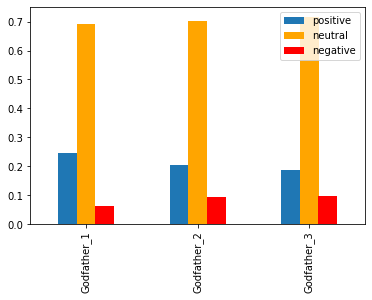

In [212]:
df.transpose().plot(kind='bar',color=["tab:blue", "orange", "r"])
plt.show()

### Most positive and most negative Critics

In [214]:
positively_sorted = {k: v for k, v in sorted(sentiments.items(), key=lambda item: item[1][0], reverse=True)}
negatively_sorted = {k: v for k, v in sorted(sentiments.items(), key=lambda item: item[1][2], reverse=True)}

print("most positive criticisms: ", end='')
for person in positively_sorted:
    print(person, end='  ')

print()

print("most negative criticisms: ", end='')
for movie in negatively_sorted:
    print(movie, end='  ')

most positive criticisms: Godfather_1  Godfather_2  Godfather_3  
most negative criticisms: Godfather_3  Godfather_2  Godfather_1  

This result was predictable and completely reasonable. Since many people consider the Godfather part 1 as the best movie ever. Also the second one was masterpiece but the third one was kind of dissapointing in comparison with the other two. So the most positive reviews are related to the first two movies.

### Pie chart for sentiment analysis

Finally I plot the sentiment data for the 3 movies that have been mentioned above, in different pie charts. 

<ipython-input-215-77e73532656c>:14: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  axis[2].pie(df.Godfather_3, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)


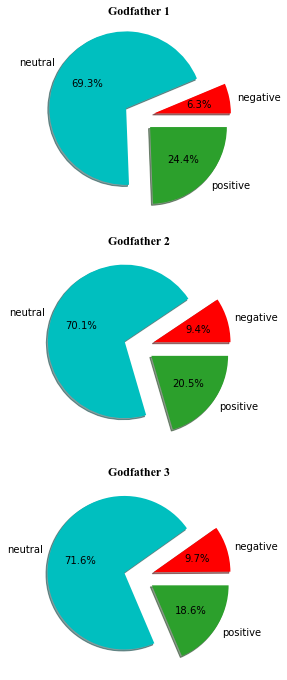

In [215]:
figure, axis = plt.subplots(3)
figure.set_size_inches(18,12)
colors = ['tab:green', 'c', 'r']
labels = ['positive', 'neutral', 'negative']
explode = (0.2, 0.2, 0.2)

#positives
axis[0].pie(df.Godfather_1, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
axis[0].set_title('Godfather 1', fontname="Times New Roman", fontweight="bold")

axis[1].pie(df.Godfather_2, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
axis[1].set_title('Godfather 2', fontname="Times New Roman", fontweight="bold")

axis[2].pie(df.Godfather_3, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
axis[2].set_title('Godfather 3', fontname="Times New Roman", fontweight="bold")


plt.show()